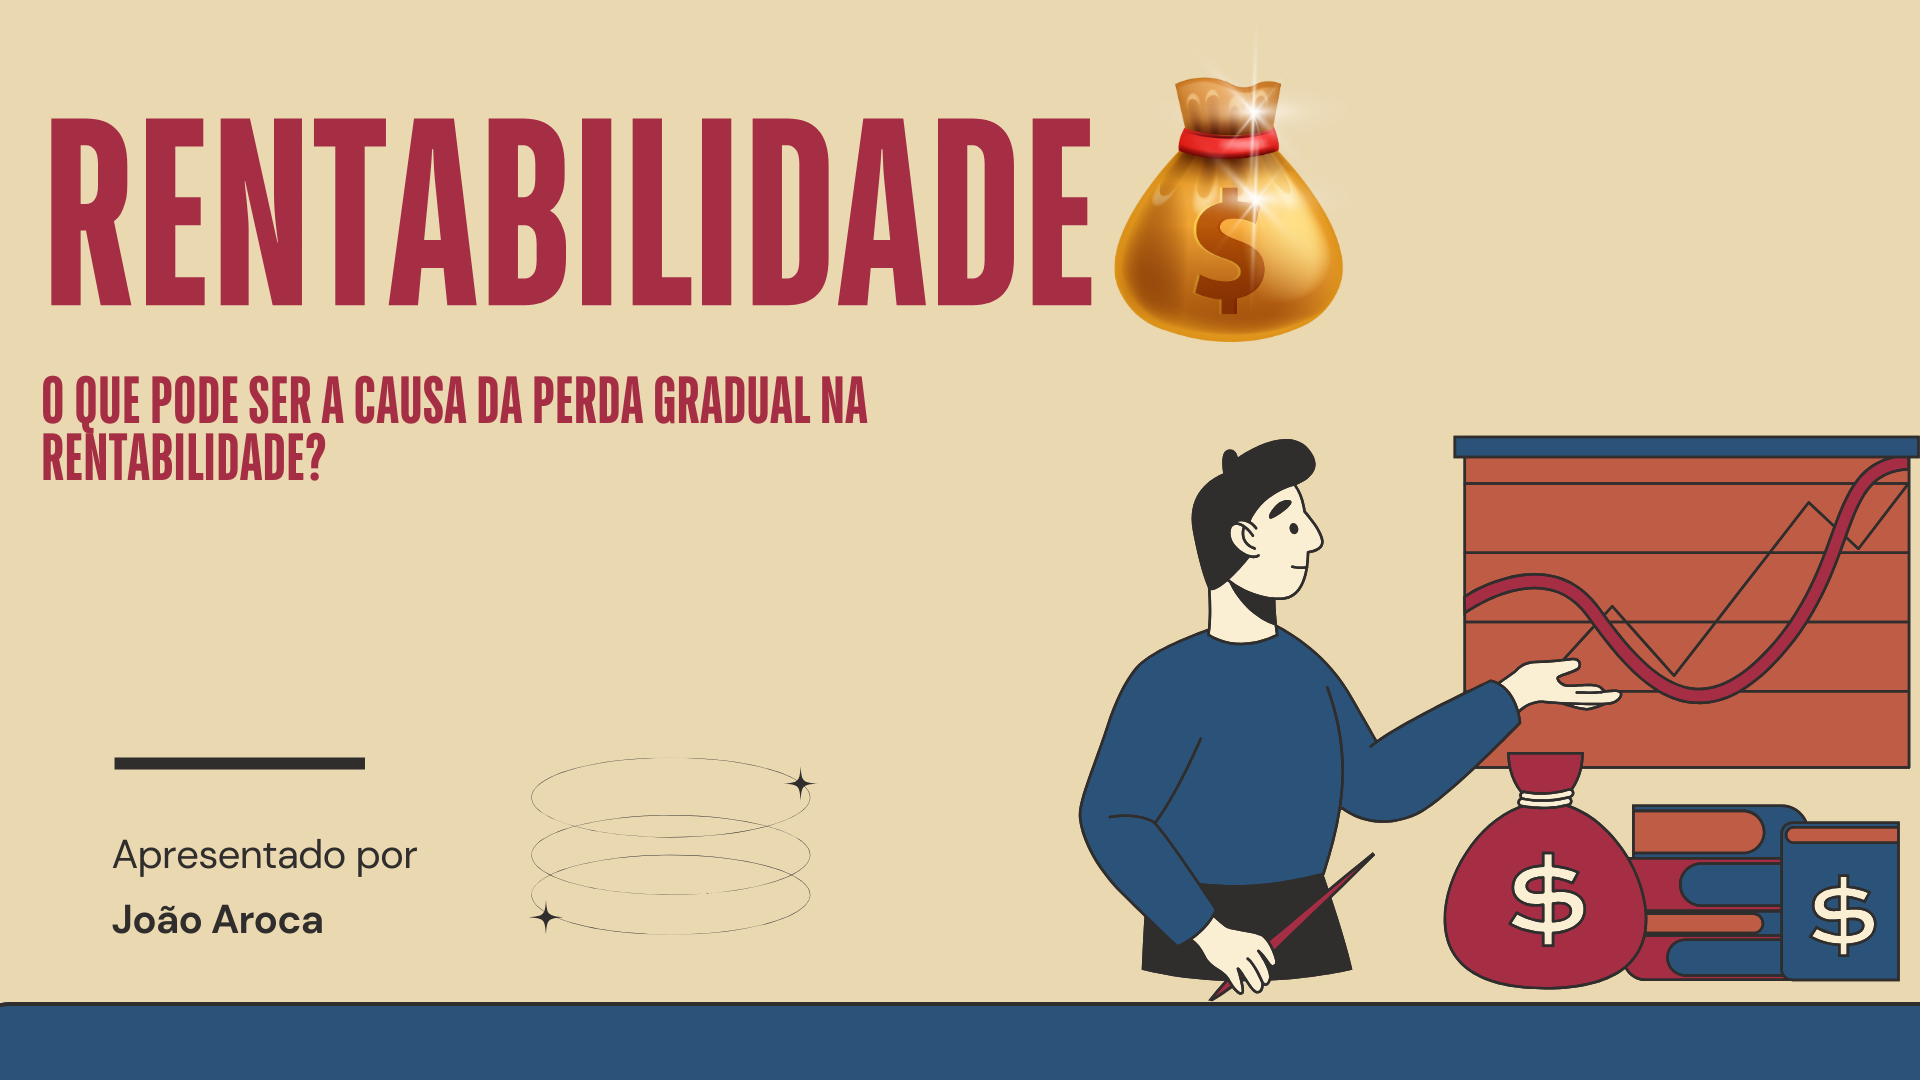

## **Problema:**

No último ano, a XVendas, uma empresa de varejo estabelecida no mercado há mais de uma década, vem enfrentando um desafio significativo em relação à sua rentabilidade. Apesar de manter um volume de vendas consistente ao longo do período, observou-se uma tendência de queda gradual na rentabilidade da empresa.

Como uma empresa líder no setor de varejo, a XVendas tem sido reconhecida por sua ampla variedade de produtos, atendimento ao cliente de alta qualidade e uma forte presença tanto em lojas físicas quanto online. No entanto, apesar de sua posição consolidada no mercado, a recente diminuição na rentabilidade tem levantado preocupações entre os gestores e acionistas da empresa.

Diante desse cenário, torna-se crucial investigar as possíveis causas desse declínio na rentabilidade, especialmente considerando que o volume de vendas permanece estável. Identificar e abordar essas questões é essencial para garantir a sustentabilidade financeira e o sucesso contínuo da XVendas no mercado competitivo em que atua.

## **Importações**

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm, spearmanr

# **1) Conhecendo o DataFrame**

In [27]:
# Lendo o DataFrame
df = pd.read_excel('/Users/joaoaroca/Documents/Portfólio/analise-rentabilidade/Case_Vaga_Analista_Intelligence_1.xlsx')

In [28]:
# Visualizando as primeiras linhas
df.head()

,Mês,Categoria,Custo Entrega,Custo dos Produtos,Custo Marketing
0,1,AC AUDIO,80353.50458,36247.578746,11352.354514
1,1,AC BT SPEAKER,45448.46538,82168.278219,19423.724235
2,1,AC CALCULADORA,2253.74290,3309.124869,813.303043
3,1,AC CELULARES,22829.13170,18308.656441,5471.035672
4,1,AC ELETRODOMESTICO,432.07736,76.286501,33.111653


In [29]:
# Visualizando todas as colunas do DataFrame
df.columns

Index(['Mês', 'Categoria', 'Custo Entrega', 'Custo dos Produtos',
       'Custo Marketing'],
      dtype='object')

In [30]:
# Visualizando a quantidade de linhas e colunas
linhas, colunas = df.shape

print(f'Linhas: {linhas}\nColunas: {colunas}')


Linhas: 3521
Colunas: 5


In [31]:
# Visualizando os tipos de variáveis
df.dtypes

Mês                     int64
Categoria              object
Custo Entrega         float64
Custo dos Produtos    float64
Custo Marketing       float64
dtype: object

As variáveis estão em um formato que possibilita seguir com a análise.

Contudo, uma boa prática é converter a coluna Mês para String, já que sua utilização não será relacionada à números e/ou cálculos, mas sim para categorizar.

In [32]:
df['Mês'] = df['Mês'].astype(str)

## **2) Limpeza dos Dados**

In [33]:
# Contagem de valores duplicados
df.duplicated().sum()

0

In [34]:
# Contagem de valores nulos
df.isnull().sum()

Mês                   0
Categoria             0
Custo Entrega         0
Custo dos Produtos    0
Custo Marketing       0
dtype: int64

Não existem valores faltantes e/ou duplicados no DataFrame. Portanto, deve-se seguir com o desenvolvimento.

# **3) Análise dos Dados**

De acordo com o enunciado, a quantidade de vendas permaneceu a mesma, no entanto, houve uma redução da rentabilidade.

É sabido que a rentabilidade é proporcional ao lucro e investimento. Para se obter uma rentabilidade menor, existem duas hipóteses: 

1) O lucro diminuiu com o mesmo investimento ou investimento maior;

2) O investimento aumentou e o lucro permaneceu o mesmo ou diminuiu.

Fórmula da rentabilidade: Rentabilidade = (Lucro / Investimento) * 100

Portanto, o que pode-se pensar é: o lucro pode estar menor, o que significaria uma menor rentabilidade.

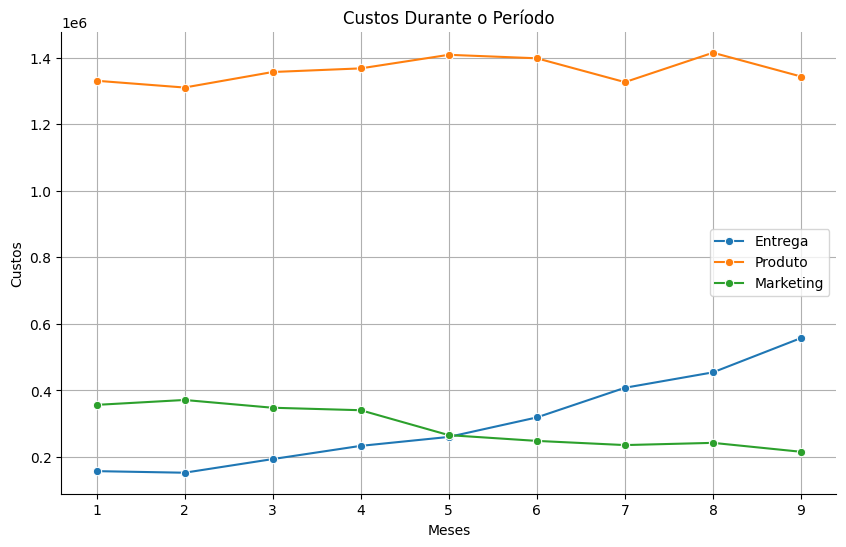

In [35]:
# Plotando o gráfico dos custos ao longo do período
fig, ax = plt.subplots(figsize=(10,6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.lineplot(x= 'Mês', y= 'Custo Entrega', data= df, errorbar= None, marker='o', label='Entrega')
sns.lineplot(x= 'Mês', y= 'Custo dos Produtos', data=df, errorbar=None, marker= 'o', label= 'Produto')
sns.lineplot(x= 'Mês', y= 'Custo Marketing', data= df, errorbar=None, marker= 'o', label= 'Marketing')

plt.title('Custos Durante o Período')
plt.xlabel('Meses')
plt.ylabel('Custos')
plt.grid(True)
plt.show()

É nítido o aumento considerável dos custos com a entrega do produto, tornando o lucro menor caso não seja repassado este valor para o consumidor, consequentemente tendo um negócio menos rentável. O custo com produtos permaneceu relativamente estável, e o custo com Marketing teve decrescimo durante o período.

Portanto, um dos deflatores é de fato o custo com entrega.

O custo elevado pode se dar por diversos fatores, como:

* Custos de transporte: Os custos associados ao transporte, como combustível, manutenção de veículos, seguros e salários dos motoristas, podem afetar diretamente o preço da entrega.

* Distância e localização: Quanto mais distante o destino da entrega e mais remoto o local, maior pode ser o custo do transporte devido a despesas adicionais de combustível e tempo de viagem.
* Peso e volume da carga: O peso e o volume da carga a ser entregue podem influenciar o custo do transporte. Cargas pesadas ou volumosas podem exigir veículos maiores ou mais capacidade de carga, o que pode resultar em custos mais elevados.
* Urgência da entrega: Entregas urgentes ou com prazos apertados podem exigir serviços expressos ou prioritários, que geralmente têm custos mais altos do que opções de entrega padrão.
* Tipo de entrega: O método de entrega escolhido também pode afetar o preço. Por exemplo, a entrega porta a porta pode ser mais cara do que a entrega em um ponto de coleta.
* Tempo e sazonalidade: A demanda por serviços de entrega pode variar ao longo do tempo e em diferentes épocas do ano. Em períodos de alta demanda, como durante as festas de fim de ano, os preços das entregas podem aumentar devido à maior concorrência e disponibilidade limitada de recursos.
* Regulamentações e tarifas: Regulamentações governamentais, tarifas de pedágio e outras taxas podem impactar os custos de entrega, especialmente em rotas específicas ou em determinadas áreas geográficas.

### **Mas como que a variável Custo Entrega se relaciona com as outras?**

Outra prática importante é entender a correlação entre as variáveis. O mais comum de se utilizar para medir a correlação entre as variáveis, é a correlação de Pearson. Contudo, precisa-se verificar se os dados atendem às premissas para se utilizar a correlação de Pearson.

Será realizado um teste Kolmogorov-Smirnov (KS) para verificar se os dados seguem uma distribuição normal.

### **Teste de Hipótese - Os dados seguem uma distribuição normal?**

**Hipótese Nula (H0):** Os dados seguem uma distribuição normal.

**Hipótese Alternativa (HA):** Os dados não seguem uma distribuição normal.

**Nível de Significância:** 0.05

In [36]:
# Realizando o teste de Kolmogorov-Smirnov
ks_statistic, ks_p_value = kstest(df['Custo Entrega'], 'norm')

print("Estatística de teste KS:", ks_statistic)
print("Valor-p:", ks_p_value)

Estatística de teste KS: 0.9964280792584992
Valor-p: 0.0


In [37]:
# Realizando o teste de Kolmogorov-Smirnov
ks_statistic, ks_p_value = kstest(df['Custo Marketing'], 'norm')

print("Estatística de teste KS:", ks_statistic)
print("Valor-p:", ks_p_value)

Estatística de teste KS: 0.9809913822521509
Valor-p: 0.0


In [38]:
# Realizando o teste de Kolmogorov-Smirnov
ks_statistic, ks_p_value = kstest(df['Custo dos Produtos'], 'norm')

print("Estatística de teste KS:", ks_statistic)
print("Valor-p:", ks_p_value)

Estatística de teste KS: 0.992364171268113
Valor-p: 0.0


Com base nos resultados do teste de Kolmogorov-Smirnov, rejeitamos a hipótese nula de que os dados seguem a distribuição teórica especificada (H0). O valor-p associado ao teste foi significativamente baixo (p < 0.05), indicando que há evidências suficientes para concluir que os dados não seguem a distribuição normal.

Portanto, os dados podem ser considerados como não provenientes de uma distribuição normal. Esta conclusão sugere que os dados podem ter uma distribuição diferente da normal, e pode ser necessário explorar outras distribuições teóricas ou realizar análises adicionais para entender melhor a distribuição dos dados.

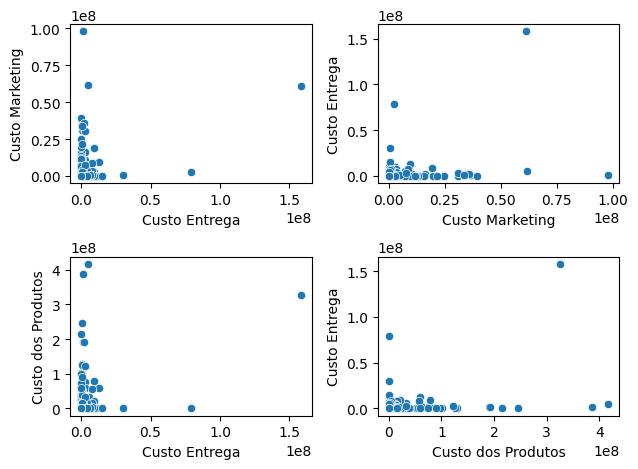

In [39]:
plt.subplot(2,2,1)
sns.scatterplot(x= df['Custo Entrega'], y= df['Custo Marketing'], data=df)

plt.subplot(2,2,2)
sns.scatterplot(x= df['Custo Marketing'], y= df['Custo Entrega'], data=df)

plt.subplot(2,2,3)
sns.scatterplot(x= df['Custo Entrega'], y= df['Custo dos Produtos'], data= df)

plt.subplot(2,2,4)
sns.scatterplot(x= df['Custo dos Produtos'], y= df['Custo Entrega'], data=df)

plt.tight_layout()

Observando os gráficos, é possível identificar que os dados não seguem uma distribuição linear entre as variáveis. 

Como os dados não seguem uma distribuição normal, nem apresentam uma relação linear entre as variáveis, não é apropriado utilizar o teste de Pearson, que é comumente empregado para verificar a correlação entre as variáveis. O teste de Pearson pressupõe que os dados sigam uma distribuição normal e que haja linearidade entre as variáveis, duas premissas que não foram atendidas. Portanto, não faz sentido prosseguir com esse teste.

O teste de correlação de Spearman é uma alternativa não paramétrica ao teste de Pearson. Ele não faz suposições sobre a distribuição dos dados e é menos sensível a distribuições não normais. Portanto, é mais adequado quando os dados não seguem uma distribuição normal ou quando a relação entre as variáveis não é linear.

### **Mapa de Calor (Heatmap)**

Text(0.5, 1.0, 'Mapa de Carlor da Correlação de Spearman')

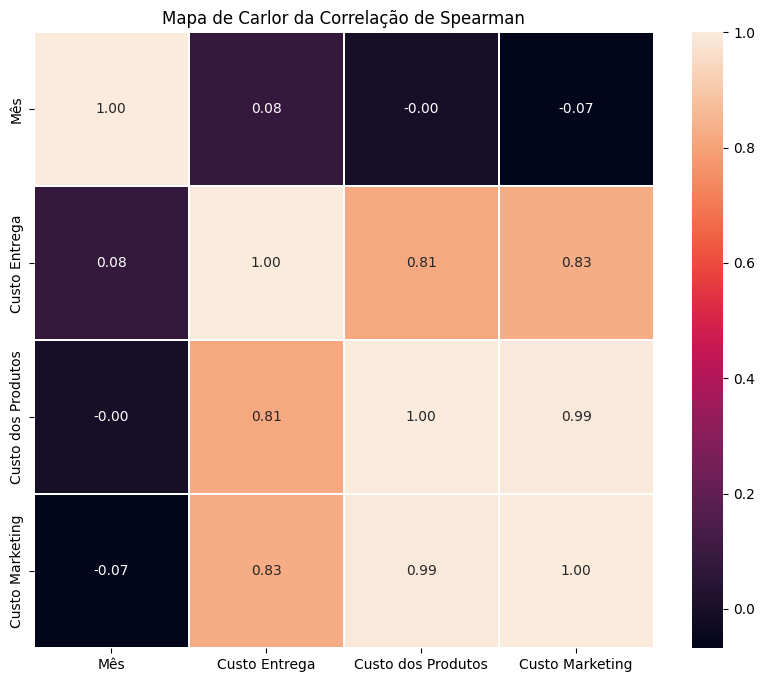

In [40]:
correlacao = df.drop(columns='Categoria').corr(method='spearman')

plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot=True, fmt= '.2f', linewidths=.06)
plt.title('Mapa de Carlor da Correlação de Spearman')

O mapa de calor tem como objetivo demonstrar a correlação existente entre as variáveis numéricas do DataFrame.

A correlação pode variar de -1 a 1, onde:

Quanto mais próximo de -1, maior é a correlação negativa, indicando que quando uma variável aumenta, a outra tende a diminuir;
Quanto mais próximo de 1, maior é a correlação positiva, indicando que quando uma variável aumenta, a outra também aumenta;
Quanto mais próximo de 0, menor é a correlação entre as variáveis.
Portanto, podemos observar uma correlação positiva considerável entre:

Custo de Entrega e Custo de Marketing (0.83);
Custo de Entrega e Custo dos Produtos (0.81).
Embora haja uma correlação alta, é uma prática recomendada realizar um teste de hipótese para determinar se essa correlação é estatisticamente significativa.

### **Teste de Hipótese**

**Hipótese Nula (H0):** A correlação é = 0 

**Hipótese Alternativa (Ha):** A correlação é diferente de 0

**Nível de Significância:** 0.05

In [41]:
corr, p_valor = spearmanr(df['Custo Entrega'], df['Custo Marketing'])

print("Correlação de Spearman:", corr)
print("Valor-p:", p_valor)

Correlação de Spearman: 0.8284836708375595
Valor-p: 0.0


In [42]:
corr, p_valor = spearmanr(df['Custo Entrega'], df['Custo dos Produtos'])

print("Correlação de Spearman:", corr)
print("Valor-p:", p_valor)

Correlação de Spearman: 0.814631607853631
Valor-p: 0.0


Como o p-valor foi encontrado abaixo do nível de significância (0.05), podemos rejeitar fortemente a hipótese nula de que não há correlação entre as variáveis. Portanto, há evidências estatísticas significativas para suportar a existência de uma correlação entre as variáveis, embora o coeficiente de correlação de Spearman por si só não forneça informações sobre a direção ou magnitude dessa correlação.

# **Conclusão**

Após analisar os dados, observamos que a rentabilidade do Xvendas foi impactada pelo aumento no custo de entrega durante o período em análise. No entanto, é importante ressaltar que este fator isolado não explica completamente a situação. Através do gráfico de correlação, identificamos que tanto o custo dos produtos quanto o custo de marketing apresentam correlação com o custo de entrega.

Portanto, para melhorar a rentabilidade da empresa, não apenas é necessário adotar estratégias para otimizar a logística, mas também é crucial revisar os custos relacionados aos produtos e ao marketing. Embora parte do problema possa ser considerada externa e fora do controle da empresa, é fundamental concentrar esforços na identificação de oportunidades internas para alcançar o objetivo de aumentar o rendimento da companhia.